In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
data = fashion_mnist.load_data()
data

4423680/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
# 3차원 배열 형태로 되어있기 때문에 한번에 훈련, 평가, 문제, 정답으로 순서대로 분리를 시켜줌
((X_train, y_train), (X_test, y_test)) = data

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# 정답 데이터를 확률 정보로 변경
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#### 활성화 함수, 최적화 함수 별 비교
1. 중간층 활성화 함수: sigmoid, 최적화 함수: SGD
2. 중간층 활성화 함수: relu, 최적화 함수: SGD
3. 중간층 활성화 함수: relu, 최적화 함수: Adam

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam   # 최적화 함수를 불러오기 (하이퍼파라미터 변경)

In [7]:
# sigmoid + SGD

model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(128, activation='sigmoid'))
model1.add(Dense(256, activation='sigmoid'))
model1.add(Dense(128, activation='sigmoid'))
model1.add(Dense(64, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 175,306
Trainable params: 175,306
Non-trainable params: 0
__________________________________________________

In [8]:
model1.compile(loss="categorical_crossentropy",
              optimizer=SGD(lr=0.01),   
              metrics=["acc"]
              )

In [9]:
h1 = model1.fit(X_train, y_train_one_hot, validation_split = 0.3,epochs=50)

Epoch 1/50
1313/1313 [==============================] - 5s 3ms/step - loss: 2.3125 - acc: 0.1189 - val_loss: 2.2819 - val_acc: 0.1008
Epoch 2/50
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2736 - acc: 0.2052 - val_loss: 2.2295 - val_acc: 0.3495
Epoch 3/50
1313/1313 [==============================] - 4s 3ms/step - loss: 2.1853 - acc: 0.3127 - val_loss: 1.9191 - val_acc: 0.2758
Epoch 4/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.8138 - acc: 0.3669 - val_loss: 1.6135 - val_acc: 0.4395
Epoch 5/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.5640 - acc: 0.4475 - val_loss: 1.4341 - val_acc: 0.4454
Epoch 6/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3930 - acc: 0.4920 - val_loss: 1.2966 - val_acc: 0.5348
Epoch 7/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2767 - acc: 0.5298 - val_loss: 1.2072 - val_acc: 0.5802
Epoch 8/50
1313/1313 [==============================] - 4s 3ms

In [18]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss="categorical_crossentropy",
              optimizer=SGD(lr=0.001),   
              metrics=["acc"]
              )

h2 = model2.fit(X_train, y_train_one_hot, validation_split = 0.3,epochs=50)

Epoch 1/50
1313/1313 [==============================] - 5s 3ms/step - loss: 3.4395 - acc: 0.6445 - val_loss: 0.6004 - val_acc: 0.7912
Epoch 2/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5603 - acc: 0.8013 - val_loss: 0.5329 - val_acc: 0.8131
Epoch 3/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4806 - acc: 0.8288 - val_loss: 0.4890 - val_acc: 0.8284
Epoch 4/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.4483 - acc: 0.8375 - val_loss: 0.4928 - val_acc: 0.8261
Epoch 5/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4167 - acc: 0.8488 - val_loss: 0.4846 - val_acc: 0.8290
Epoch 6/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3997 - acc: 0.8529 - val_loss: 0.4709 - val_acc: 0.8329
Epoch 7/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3839 - acc: 0.8605 - val_loss: 0.4445 - val_acc: 0.8417
Epoch 8/50
1313/1313 [==============================] - 4s 3ms

In [19]:
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss="categorical_crossentropy",
              optimizer=Adam(lr=0.001),   
              metrics=["acc"]
              )

h3 = model3.fit(X_train, y_train_one_hot, validation_split = 0.3,epochs=50)

Epoch 1/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3295 - acc: 0.6941 - val_loss: 0.5071 - val_acc: 0.8222
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4980 - acc: 0.8248 - val_loss: 0.4695 - val_acc: 0.8356
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4428 - acc: 0.8415 - val_loss: 0.4916 - val_acc: 0.8168
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4215 - acc: 0.8475 - val_loss: 0.4287 - val_acc: 0.8506
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3899 - acc: 0.8607 - val_loss: 0.4054 - val_acc: 0.8589
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3780 - acc: 0.8663 - val_loss: 0.4097 - val_acc: 0.8585
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3563 - acc: 0.8715 - val_loss: 0.3827 - val_acc: 0.8677
Epoch 8/50
1313/1313 [==============================] - 5s 4ms

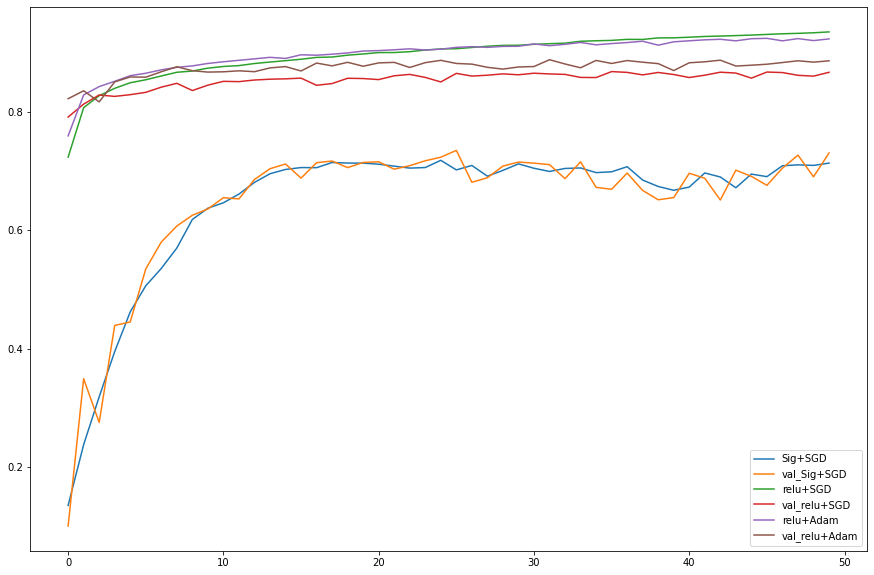

In [20]:
plt.figure(figsize=(15,10))
plt.plot(h1.history['acc'],
         label = 'Sig+SGD'
         )

plt.plot(h1.history['val_acc'],
         label = 'val_Sig+SGD'
         )

plt.plot(h2.history['acc'],
         label = 'relu+SGD'
         )

plt.plot(h2.history['val_acc'],
         label = 'val_relu+SGD'
         )


plt.plot(h3.history['acc'],
         label = 'relu+Adam'
         )

plt.plot(h3.history['val_acc'],
         label = 'val_relu+Adam'
         )


plt.legend()
plt.show()

최적화 모델 찾기
- 모델체크포인트: 모델을 저장
- 얼리스탑핑: 조기 학습 중단 (과대적합, 시간낭비 방지)

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
# 1. 모델 저장
# epoch는 keras에서 지정해 놓은 키워드
# d : 10진수, 03: 0이 3개 붙어 있는 형태 (0001, 0002)
# f :소수점 형태, .4 : 소수점 4자리까지 형태의 자릿수
# .hdf5 : 저장되는 파일의 확장자명
save_path = './model/FashionModel_{epoch:03d}_{val_acc:.4f}.hdf5'

f_mckp = ModelCheckpoint(filepath=save_path, 
                         monitor ='val_acc',    # 해당 값 을 기준으로 파일을 저장
                         verbose = 1,           # 모델 개선 및 저장 메시지 표시 (0이면 표시x)
                         save_best_only = True    # monitor 값이 가장 최고점을 갱신 했을때 모델 저장
                         )

In [23]:
# 2. 조기 학습 중단
f_early = EarlyStopping(monitor='val_acc',
                        patience=5              #monitor 값 개선을 몇번이나 기다려 볼 것인지 설정
                        )

In [25]:
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss="categorical_crossentropy",
              optimizer=Adam(lr=0.001),   
              metrics=["acc"]
              )

h4 = model4.fit(X_train, y_train_one_hot, validation_split = 0.3,epochs=50, callbacks=[f_mckp,f_early])

Epoch 1/50
1313/1313 [==============================] - 6s 4ms/step - loss: 2.4538 - acc: 0.6929 - val_loss: 0.5371 - val_acc: 0.8171

Epoch 00001: val_acc improved from -inf to 0.81706, saving model to ./model/FashionModel_001_0.8171.hdf5
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5037 - acc: 0.8219 - val_loss: 0.4475 - val_acc: 0.8398

Epoch 00002: val_acc improved from 0.81706 to 0.83978, saving model to ./model/FashionModel_002_0.8398.hdf5
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4382 - acc: 0.8421 - val_loss: 0.4688 - val_acc: 0.8351

Epoch 00003: val_acc did not improve from 0.83978
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4341 - acc: 0.8450 - val_loss: 0.4296 - val_acc: 0.8467

Epoch 00004: val_acc improved from 0.83978 to 0.84672, saving model to ./model/FashionModel_004_0.8467.hdf5
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3935 - acc:

저장된 모델 로딩하기

In [26]:
from tensorflow.keras.models import load_model

In [27]:
best_model = load_model("/content/model/FashionModel_007_0.8702.hdf5")

In [28]:
best_model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 1ms/step - loss: 0.4024 - acc: 0.8595


[0.4023662209510803, 0.859499990940094]